In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load the Data set

In [2]:
df=pd.read_csv("Salary_Data.csv")

In [3]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# EDA And Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
import matplotlib.pyplot as plt

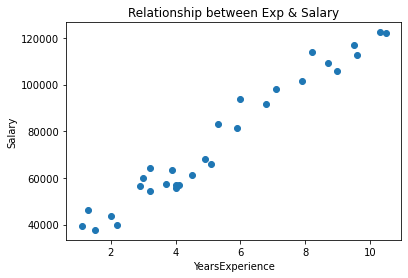

In [6]:
plt.scatter(df["YearsExperience"],df["Salary"])
plt.title("Relationship between Exp & Salary")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

# Correlation Analysis

In [7]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#Linear Regression with Sciket-learn libraries 

In [8]:
X=df ["YearsExperience"]
Y=df["Salary"]

In [9]:
X

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [10]:
Y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

# Model Building

In [11]:
import statsmodels.formula .api as smf

In [12]:
model=smf.ols("Salary~YearsExperience",data=df).fit()

# Model Testing

In [13]:
# Finding Cefficient Parameters
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [14]:
# Finding Pvalues and tvalues
model.tvalues, model.pvalues

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [15]:
# Finding Rsquared values
model.rsquared , model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [16]:
# or finding the r-square value

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
y_pred = model.predict(X)

In [19]:
mean_squared_error(Y,y_pred)

31270951.72228097

In [20]:
from sklearn.metrics import r2_score
r2_score(Y,y_pred)

0.9569566641435086

In [21]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Model Prediction

In [22]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [23]:
# Automatic Prediction for say 3 & 5 Years Experience 

In [24]:
new_df=pd.Series([3,5])
new_df

0    3
1    5
dtype: int64

In [25]:
df_pred=pd.DataFrame(new_df,columns=['YearsExperience'])
df_pred

,YearsExperience
0,3
1,5


In [26]:
model.predict(df_pred)

0    54142.087163
1    73042.011806
dtype: float64

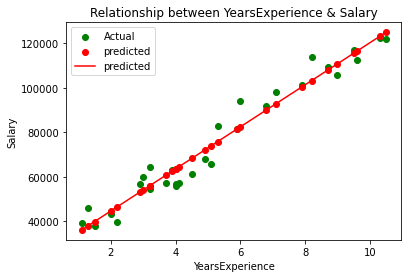

In [27]:
plt.scatter(df["YearsExperience"],df["Salary"],color='green',label="Actual")
plt.scatter(df["YearsExperience"],y_pred,color='red',label="predicted")
plt.plot(df["YearsExperience"],y_pred,color='red',label="predicted")

plt.title("Relationship between YearsExperience & Salary")
plt.xlabel("YearsExperience")
plt.legend()
plt.ylabel("Salary")
plt.show()